In [24]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("max_columns", None)
%matplotlib inline

In [25]:
listings = pd.read_csv('listings.csv',low_memory=False)
calendar = pd.read_csv('calendar.csv',low_memory=False)
reviews = pd.read_csv('reviews.csv',low_memory=False)

In [26]:
def check_all_missing_and_uniqueue(data):
    drop_list =[]
    for x in data.columns:
        if data[x].nunique() == 1:
            print(x,' : Has single unique value for all rows and can be dropped')
            drop_list.append(x)
        if data[x].nunique() == 0:
            print(x,' : Has all blank rows and can be dropped')
            drop_list.append(x)
    return drop_list
        
            
            
            

In [27]:
def missing_values_percentage(data,threshold):
    drop_list =[]
    for x in data.columns:
        if (data[x].count()/len(data)) <= threshold:
            print(x,' Has more than ',threshold*100,' Percent missing values')
            drop_list.append(x)
    return drop_list
        

In [28]:
drop_list = check_all_missing_and_uniqueue(listings)

scrape_id  : Has single unique value for all rows and can be dropped
last_scraped  : Has single unique value for all rows and can be dropped
experiences_offered  : Has single unique value for all rows and can be dropped
neighbourhood_group_cleansed  : Has all blank rows and can be dropped
state  : Has single unique value for all rows and can be dropped
country_code  : Has single unique value for all rows and can be dropped
country  : Has single unique value for all rows and can be dropped
has_availability  : Has all blank rows and can be dropped
calendar_last_scraped  : Has single unique value for all rows and can be dropped
requires_license  : Has single unique value for all rows and can be dropped
license  : Has all blank rows and can be dropped
jurisdiction_names  : Has all blank rows and can be dropped


In [29]:
drop_list2 =missing_values_percentage(listings,0.8)

space  Has more than  80.0  Percent missing values
neighborhood_overview  Has more than  80.0  Percent missing values
notes  Has more than  80.0  Percent missing values
transit  Has more than  80.0  Percent missing values
access  Has more than  80.0  Percent missing values
interaction  Has more than  80.0  Percent missing values
house_rules  Has more than  80.0  Percent missing values
host_about  Has more than  80.0  Percent missing values
neighbourhood_group_cleansed  Has more than  80.0  Percent missing values
square_feet  Has more than  80.0  Percent missing values
weekly_price  Has more than  80.0  Percent missing values
monthly_price  Has more than  80.0  Percent missing values
security_deposit  Has more than  80.0  Percent missing values
cleaning_fee  Has more than  80.0  Percent missing values
has_availability  Has more than  80.0  Percent missing values
first_review  Has more than  80.0  Percent missing values
last_review  Has more than  80.0  Percent missing values
review_scor

In [30]:
check_all_missing_and_uniqueue(reviews)

[]

In [31]:
check_all_missing_and_uniqueue(calendar)

[]

In [32]:
missing_values_percentage(reviews,0.8)

[]

In [33]:
missing_values_percentage(calendar,0.8)

price  Has more than  80.0  Percent missing values


['price']

In [34]:
listings['price'] = listings['price'].map(lambda p: int(p[1:-3].replace(",", "")))
listings['amenities'] = listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)

In [35]:
set(np.concatenate(listings['amenities'].map(lambda amns: amns.split("|")).values))

{'',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Free Parking on Street',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Paid Parking Off Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50'}

0       TV|Wireless Internet|Kitchen|Free Parking on P...
1       TV|Internet|Wireless Internet|Air Conditioning...
2       TV|Cable TV|Wireless Internet|Air Conditioning...
3       TV|Internet|Wireless Internet|Air Conditioning...
4       Internet|Wireless Internet|Air Conditioning|Ki...
5       Cable TV|Wireless Internet|Air Conditioning|Ki...
6       TV|Internet|Wireless Internet|Kitchen|Free Par...
7       TV|Internet|Wireless Internet|Air Conditioning...
8       Wireless Internet|Pets live on this property|C...
9       TV|Cable TV|Internet|Wireless Internet|Air Con...
10      TV|Wireless Internet|Air Conditioning|Kitchen|...
11      TV|Cable TV|Internet|Wireless Internet|Air Con...
12      Cable TV|Wireless Internet|Air Conditioning|Ki...
13      TV|Internet|Wireless Internet|Air Conditioning...
14      Internet|Wireless Internet|Kitchen|Free Parkin...
15      TV|Internet|Wireless Internet|Air Conditioning...
16      TV|Cable TV|Internet|Wireless Internet|Kitchen...
17      TV|Wir

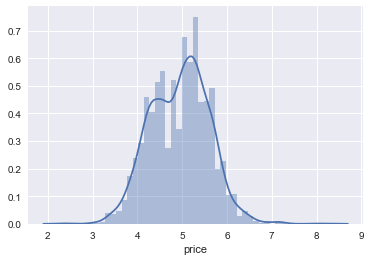

In [227]:
sns.distplot(np.log(listings.price))

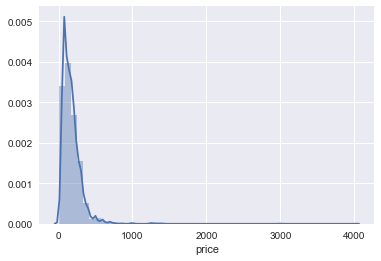

In [228]:
sns.distplot(listings.price)

In [229]:
listings['weekly_price'] .describe()

count           892
unique          243
top       $1,000.00
freq             48
Name: weekly_price, dtype: object

In [230]:
def clean_prices(listings,col):
    listings[col] = listings[col].astype(object)
    listings[col]  =listings[col].map(lambda x: x.replace(",", ""))
    listings[col] = listings[col].map(lambda p: p[1:-3])
    return listings

In [231]:
listings['monthly_price2'] = listings['monthly_price'].astype(str)
listings['monthly_price2']  =listings['monthly_price2'].map(lambda x: x.replace(",", ""))
listings['monthly_price2'] = listings['monthly_price2'].map(lambda p: p[1:-3])
listings['weekly_price2'] = listings['weekly_price'].astype(str)
listings['weekly_price2']  =listings['weekly_price2'].map(lambda x: x.replace(",", ""))
listings['weekly_price2'] = listings['weekly_price2'].map(lambda p: p[1:-3])

In [20]:
categorical = ['host_verifications','neighbourhood_cleansed','property_type','room_type','bed_type','amenities','cancellation_policy']

In [21]:
listings  = pd.get_dummies(data=listings,columns=categorical,drop_first=True)

In [22]:
listings.to_csv('listings_preporcessed.csv')

In [233]:
listings['monthly_price'].describe()

count           888
unique          288
top       $3,500.00
freq             30
Name: monthly_price, dtype: object

In [235]:
listings[listings['weekly_price2']==''].loc['weekly_price2'] = listings[listings['weekly_price2']=='']['price']*7

C:\Users\varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [238]:
len(listings)

3585

In [ ]:
for x in len()

In [236]:
listings['weekly_discount']= listings['price'].astype(int)*7 -listings['weekly_price2'].replace('',0).astype(int)

In [237]:
listings[['price','weekly_price2','weekly_discount']]

,price,weekly_price2,weekly_discount
0,250,,1750
1,65,400,55
2,65,395,60
3,75,,525
4,79,,553
5,75,,525
6,100,,700
7,75,,525
8,58,,406
9,229,,1603


In [175]:
listings2.fillna(0,inplace=True)

0          
1       400
2       395
3          
4          
5          
6          
7          
8          
9          
10         
11      350
12         
13         
14      950
15      350
16      750
17         
18         
19      280
20      250
21         
22      420
23      700
24         
25      625
26      500
27      500
28      500
29      400
       ... 
3555       
3556       
3557       
3558       
3559       
3560       
3561       
3562       
3563       
3564       
3565       
3566       
3567       
3568       
3569       
3570       
3571       
3572       
3573       
3574       
3575       
3576       
3577       
3578       
3579       
3580       
3581       
3582       
3583       
3584       
Name: weekly_price2, Length: 3585, dtype: object

In [ ]:
listings['weekly_price2']  =listings['weekly_price'] .astype(str)

In [ ]:
listings['weekly_price2']  =listings['weekly_price2'].replace(",", "")

In [ ]:
listings['weekly_price2'] = listings['weekly_price2'].map(lambda p: p[1:-3])

In [ ]:
listings[['weekly_price','weekly_price2']]

In [ ]:
listings['weekly_price'] = listings['weekly_price'].map(lambda p: p[1:-3].replace(",", ""))

In [ ]:
listings['monthly_price']= listings['monthly_price'].map(lambda p: int(p[1:-3].replace(",", "")))